In [57]:
import numpy as np

def load_convert_data(filepath):
  with open(filepath) as f:
    lines = f.read().splitlines()

    a = [int(n) for n in lines[0].split()]
    k, m = a[0], a[1]

    data = lines[1:]

    for index, item in enumerate(data):
      data[index] = [float(num) for num in item.split()]

    data = np.matrix(data)

    return k, m, data

k, m , points = load_convert_data('rosalind_ba8c.txt')
n = points.shape[0]
dist = np.zeros((n, k))
clusters = np.argmin(dist, axis=1)
prev_clusters = np.matrix(clusters)
print(f'{n} points, {k} clusters, {m} dimensions')
print(f'Points:\n {points}')

centers = points[:k,]
print(f'Initial Centers:\n {centers}')

i = 0
while not np.array_equal(clusters, prev_clusters):
  prev_clusters = clusters

  #Centers to Clusters
  for index, center in enumerate(centers):
    dist[:,index] = [np.linalg.norm(point - center) for point in points]
  #print(dist) 
  clusters = np.argmin(dist, axis=1)
  #print(clusters)

  #Clusters to Centers
  for index, center in enumerate(centers):
    p = points[clusters == index]
    centers[index] = np.mean(p, axis=0)
  #print(centers)

  i += 1

print(f'Final Centers: \n{centers}')
print(f'Iterations: {i}')


# Output
# 7.561 6.167 16.568 6.078 7.096
# 18.232 6.147 5.468 6.578 6.053
# 7.037 17.299 6.927 5.495 7.028
# 7.712 7.233 6.916 18.717 6.838
# 6.042 6.279 5.708 7.014 17.408
# 5.158 4.559 5.113 5.144 4.719

1209 points, 6 clusters, 3 dimensions
Points:
 [[ 1.   4.4  2.2]
 [ 4.5  2.8 20.2]
 [ 5.3  9.9 15.4]
 ...
 [ 4.8  6.4  9.4]
 [ 1.5  1.1 14. ]
 [ 1.1  7.1 13.9]]
Initial Centers:
 [[ 1.   4.4  2.2]
 [ 4.5  2.8 20.2]
 [ 5.3  9.9 15.4]
 [ 1.5  5.8  3.7]
 [ 8.5 12.5 12.9]
 [ 6.3  7.   8.4]]
Final Centers: 
[[ 5.17183557  3.54208854  4.02658288]
 [ 4.94193541  4.81572592 13.81209772]
 [10.4361111  13.02592592 18.23888881]
 [ 4.5626791  11.78803785  4.88421   ]
 [ 8.71136373 22.59431815  6.10568176]
 [16.31111111  6.47136752  5.77179487]]
Iterations: 25


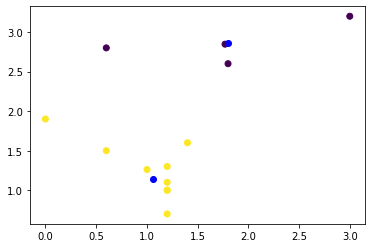

In [56]:
import matplotlib.pyplot as plt

x = points[:, 0].reshape([points.shape[0],]).tolist()[0]
y = points[:, 1].reshape([points.shape[0],]).tolist()[0]
plt.scatter(x, y, c=clusters)


centers = np.matrix('1.8 2.867; 1.060 1.14')
x_center = centers[:, 0].reshape([centers.shape[0],]).tolist()[0]
y_center = centers[:, 1].reshape([centers.shape[0],]).tolist()[0]
plt.scatter(x_center, y_center, c='blue')

In [50]:
true_centers = np.matrix('7.561 6.167 16.568 6.078 7.096; 18.232 6.147 5.468 6.578 6.053; 7.037 17.299 6.927 5.495 7.028; 7.712 7.233 6.916 18.717 6.838; 6.042 6.279 5.708 7.014 17.408; 5.158 4.559 5.113 5.144 4.719')

diff = true_centers - centers
print(diff, np.sum(diff))
sse = np.sum(np.dot(diff, diff.T))
print(sse)

[[-0.04309269  0.00384152  0.02121514  0.04817433 -0.02973132]
 [ 0.05132782 -0.00594113 -0.03284039  0.0494287   0.02442857]
 [-0.02425013 -0.02224831 -0.0011249   0.01687543  0.02799987]
 [-0.01398431  0.03299997 -0.00525984 -0.03654332 -0.04310237]
 [-0.02551592 -0.01781529  0.00417833  0.04329936  0.03984714]
 [ 0.08906037  0.02490947  0.04216646 -0.08099983  0.03528799]] 0.17259073730169927
0.006790270903518105
